# Figure 2

All plots in the manuscript are done with DPI = 600. In the jupyter notebook I changed it to *200*


# Packages required

Run it all at the same time to get the plots 

In [15]:

from scipy.integrate import odeint, solve_ivp, lsoda
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from lmfit import Parameters, minimize, Model, report_fit, conf_interval
from sklearn.metrics import mean_squared_error
import numdifftools
from PIL import Image
from sklearn.metrics import r2_score
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



import scipy.optimize
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tkr
import scipy.stats as st
from scipy.stats import scoreatpercentile



import glob


# Asthetics

In [16]:
colors = [  "#56B4E9", "#009E73", "#CC79A7", "#999999", "#E69F00","#DB2B39", "#0076A1", "#0072B2", "#1A5042","#0C1713"]
palette = sns.color_palette(colors)

sns.set_theme(context='notebook', style='ticks', font='Arial', 
              font_scale=1.3, 
              rc={"lines.linewidth": 1.3, 'axes.linewidth':1.3, 
                                  "xtick.major.width":1.3,"ytick.major.width":1.3}, 
              palette = palette)
sns.color_palette(colors)

[(0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.6, 0.6, 0.6),
 (0.9019607843137255, 0.6235294117647059, 0.0),
 (0.8588235294117647, 0.16862745098039217, 0.2235294117647059),
 (0.0, 0.4627450980392157, 0.6313725490196078),
 (0.0, 0.4470588235294118, 0.6980392156862745),
 (0.10196078431372549, 0.3137254901960784, 0.25882352941176473),
 (0.047058823529411764, 0.09019607843137255, 0.07450980392156863)]

# Figure 2C and 2D

In [17]:
def monoexponential(x, A, k, B):
    """
    Compute the value of a monoexponential function at point x.
    
    Args:
        x (float): The input value.
        A (float): Amplitude or initial value.
        k (float): Decay constant or growth rate.
    
    Returns:
        float: The value of the monoexponential function at point x.
    """
    return B + (A * np.exp(-k * x))
def fit_monoexponential_two_Azides_Yield(df):
    t = df["Time"].values
    azide1 = df["Yield1"].values
    azide2 = df["Yield2"].values

    # Fit data to monoexponential function
    popt1, pcov1 = curve_fit(monoexponential, t, azide1, p0=[100, 0.5, azide1[-2:].mean()])
    popt2, pcov2 = curve_fit(monoexponential, t, azide2, p0=[100, 0.5, azide2[-2:].mean()])

    # Calculate uncertainties
    perr1 = np.sqrt(np.diag(pcov1))
    perr2 = np.sqrt(np.diag(pcov2))

    return pd.DataFrame({"Azide1": popt1, "Azide1_err": perr1, "Azide2": popt2, "Azide2_err": perr2}, index=["A", "k", "B"])


In [18]:
data = pd.read_csv("Figure2C-D_data.csv")
data.head()

,Time,Yield1,Yield2,Azide_1,Azide_2,Type,C
0,0,0.000000,0.000000,Cys,kArg,pSS,Cys-kArg-pSS
1,1,8.692903,9.926488,Cys,kArg,pSS,Cys-kArg-pSS
2,2,17.320892,21.535094,Cys,kArg,pSS,Cys-kArg-pSS
3,4,16.035020,26.334457,Cys,kArg,pSS,Cys-kArg-pSS
4,8,21.220845,49.214543,Cys,kArg,pSS,Cys-kArg-pSS


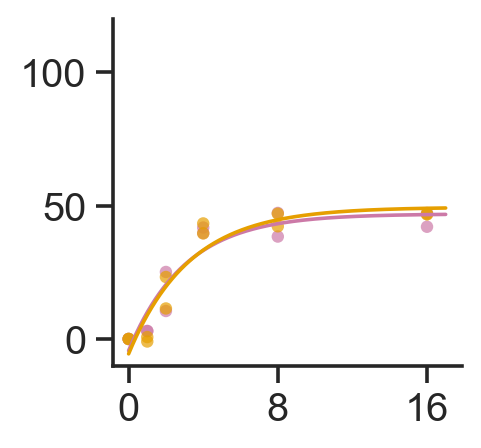

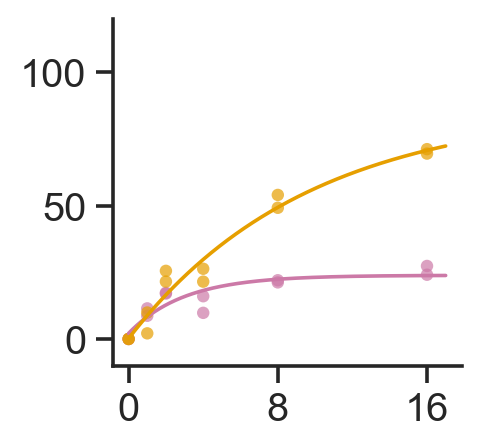

In [19]:
fits = []

colors = (["C2", "C4"], ["C2", "C4"])

for c, i in enumerate(data.groupby(["C", "Azide_1", "Azide_2"])):

    fit = fit_monoexponential_two_Azides_Yield(i[1])
    fit["Type"] = i[0][0]
    fit["Azide_1"] = i[0][1]
    fit["Azide_2"] = i[0][2]
    fits.append(fit)
    x_sim = np.linspace(0, 17, 1000)
    
    y_sim = monoexponential(x_sim, fit["Azide1"].iloc[0], fit["Azide1"].iloc[1], fit["Azide1"].iloc[2])
    y_sim2 = monoexponential(x_sim, fit["Azide2"].iloc[0], fit["Azide2"].iloc[1], fit["Azide2"].iloc[2])    

    fig, ax = plt.subplots(figsize = (2.25,2.25), dpi = 200)


    sns.scatterplot(data = i[1], x = "Time", y = "Yield1", ax = ax, 
                edgecolor = "none", s = 20, legend = False, 
                color = colors[c][0], alpha = 0.7)

    sns.scatterplot(data = i[1], x = "Time", y = "Yield2", ax = ax, 
                edgecolor = "none", s = 20, legend = False, 
                color =colors[c][1], alpha = 0.7)

    ax.plot(x_sim, y_sim, c = colors[c][0])
    ax.plot(x_sim, y_sim2, c = colors[c][1])
    sns.despine(fig, left=False, bottom=False)


    ax.set(xlabel = "", ylabel = "", xticks = np.linspace(0, 16, 3), yticks = np.linspace(0, 100, 3), ylim = (-10, 120))

    

# Figure 2E


In [20]:

import matplotlib as mpl

def colorFader(c1, c2, mix=0):
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))
    return tuple((1 - mix) * c1 + mix * c2)

def gradientFader(c1, c2, n):
    n = n-1
    gradient = []
    for x in range(n + 1):
        gradient.append(colorFader(c1, c2, x / n))
    return gradient



In [21]:
data = pd.read_csv("Figure2E.csv")
data

,Type,Azide1,Azide2,Ref,variable,value,C
0,pSS,Cys,LysArg,HS-E-09,A3,5.02,Cys-pSS
1,pSS,Cys,LysArg,HS-E-09,A3,6.49,Cys-pSS
2,no_pSS,Cys,LysArg,HS-E-09,A3,19.23,Cys-no_pSS
3,no_pSS,Cys,LysArg,HS-E-09,A3,17.94,Cys-no_pSS
4,pSS,Cys,LysArg,HS-E-09,A2B,14.86,Cys-pSS
5,pSS,Cys,LysArg,HS-E-09,A2B,18.39,Cys-pSS
6,no_pSS,Cys,LysArg,HS-E-09,A2B,45.26,Cys-no_pSS
7,no_pSS,Cys,LysArg,HS-E-09,A2B,45.28,Cys-no_pSS
8,pSS,Cys,LysArg,HS-E-09,AB2,37.87,Cys-pSS
9,pSS,Cys,LysArg,HS-E-09,AB2,39.57,Cys-pSS


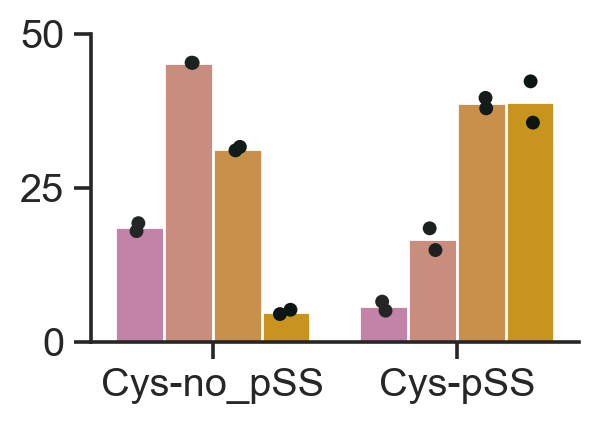

In [22]:
# Example usage:
c1 = 'C2'
c2 = 'C4'

gradient = gradientFader(c1, c2, n = 4)

fig, ax = plt.subplots(figsize = (3.15,2), dpi = 200)
sns.despine(fig, top = True, right = True)

sns.stripplot(data = data.query("C == 'Cys-pSS' | C == 'Cys-no_pSS'"), x = "C", y = "value", palette='dark:#0C1713', hue = "variable", dodge=True, size = 5, order = ['Cys-no_pSS', 'Cys-pSS'])

sns.barplot(data = data.query("C == 'Cys-pSS' | C == 'Cys-no_pSS'"), x = "C", y = "value", errorbar=None, hue = "variable", palette=gradient, width=.8)

ax.set(xlabel="", ylabel="", 
           yticks=np.linspace(0, 50, 3), 
           )
plt.legend([], frameon = False)

# Figure 2F

In [23]:
df = pd.read_csv("Figure2F_Partitioning.csv")

[[<matplotlib.axis.YTick at 0x7faf79575fa0>,
 (0.0, 55.0),
 Text(0.5, 0, ''),
 Text(0, 0.5, '')]

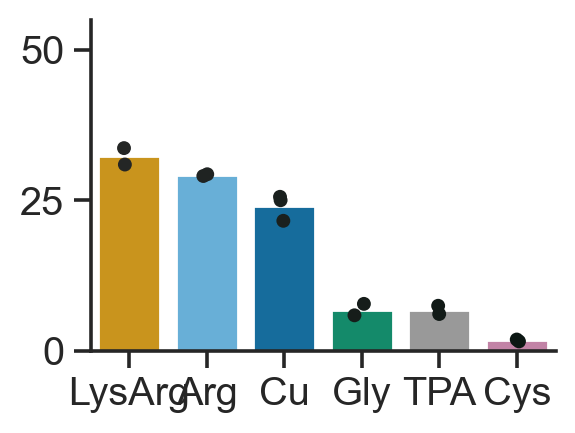

In [24]:

fig, ax = plt.subplots(figsize = (3.,2.15), dpi = 200)

Order = ["LysArg", "Arg", "Cu","Gly", "TPA","Cys"]

sns.stripplot(data = df, x = "Compound", y = "Kp", 
              palette='dark:#0C1713', legend=False, ax = ax, hue = "Compound", dodge = False, order = Order, hue_order=Order, size = 5) 


sns.barplot(data = df, x = "Compound", y = "Kp",
             hue = "Compound", 
             legend=False, 
             ax = ax, 
             dodge=False, 
             errorbar=None, 
             palette = [ "C4", "C0", "C7","C1","C3","C2"], width=0.8, order = Order, hue_order=Order)

sns.despine(top=True)

ax.set(yticks = np.linspace(0, 50, 3), ylim = (-0, 55), xlabel = "",  ylabel = "", )
 

# Figure 2G


In [25]:
data = pd.read_csv("Figure2G_Error_Rates.csv")
data

,Type,Azide1,Azide2,variable,value,C
0,no_PSS,Cys,LysArg,ER,0.597500,Cys-no_PSS
1,no_PSS,Cys,LysArg,ER,0.586633,Cys-no_PSS
2,PSS,Cys,LysArg,ER,0.275500,Cys-PSS
3,PSS,Cys,LysArg,ER,0.319400,Cys-PSS
4,seeded_PSS,Cys,LysArg,ER,0.222035,Cys-seeded_PSS
5,seeded_PSS,Cys,LysArg,ER,0.210544,Cys-seeded_PSS
6,seeded_no_PSS,Cys,LysArg,ER,0.422695,Cys-seeded_no_PSS
7,seeded_no_PSS,Cys,LysArg,ER,0.429582,Cys-seeded_no_PSS
8,seeded_no_PSS,Cys,LysArg,ER,0.441131,Cys-seeded_no_PSS
9,seeded_no_PSS,Cys,LysArg,ER,0.439677,Cys-seeded_no_PSS


[Text(0.5, 0, ''),
 Text(0, 0.5, ''),

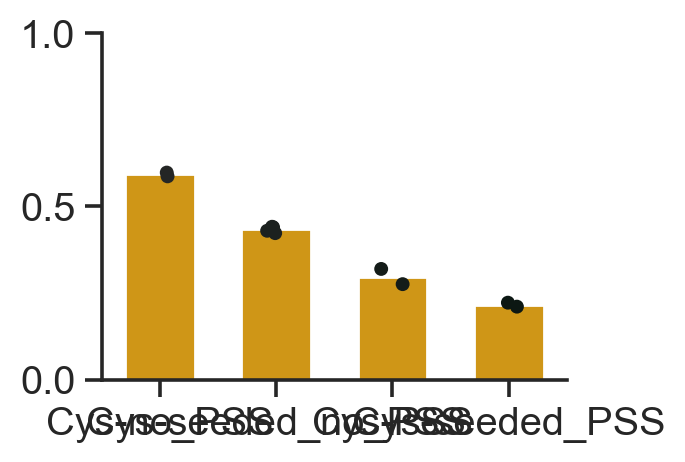

In [26]:
fig, ax = plt.subplots(figsize = (3,2.25), dpi = 200)
sns.despine(fig, top = True, right = True)


o2 = ['Cys-no_PSS', 'Cys-seeded_no_PSS', 'Cys-PSS', 'Cys-seeded_PSS']

sns.stripplot(data = data, x = "C", y = "value", palette='dark:#0C1713', hue = "C", dodge=None, size = 5, legend=None, order = o2, hue_order=o2)

sns.barplot(data = data, x = "C", y = "value", errorbar=None, hue = "C",  legend = False,  
            dodge=None, order = o2, hue_order=o2, palette=["C4"]*4, width=.6, saturation=0.8)

ax.set(xlabel="", ylabel="", 
           yticks=np.linspace(0, 1, 3), 
           )

In [27]:
def significance_stars(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'ns'

In [28]:
import pingouin as pg
a = pg.pairwise_tukey(data=data, dv='value', between='C').round(6)
a["Significance"] = a['p-tukey'].apply(significance_stars)
a

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges,Significance
0,Cys-PSS,Cys-no_PSS,0.297450,0.592067,-0.294617,0.014815,-19.886195,0.000004,-7.445114,***
1,Cys-PSS,Cys-seeded_PSS,0.297450,0.216290,0.081160,0.014815,5.478201,0.006210,2.044004,**
2,Cys-PSS,Cys-seeded_no_PSS,0.297450,0.433271,-0.135821,0.012830,-10.586003,0.000175,-6.294680,***
3,Cys-no_PSS,Cys-seeded_PSS,0.592067,0.216290,0.375777,0.014815,25.364396,0.000001,27.155012,***
4,Cys-no_PSS,Cys-seeded_no_PSS,0.592067,0.433271,0.158795,0.012830,12.376597,0.000071,14.989382,***
5,Cys-seeded_PSS,Cys-seeded_no_PSS,0.216290,0.433271,-0.216982,0.012830,-16.911684,0.000012,-20.237698,***
